In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
type(scaled_features)

numpy.ndarray

In [11]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
df_feat2 = df_feat.copy()

In [14]:
df_feat2['TARGET CLASS'] = df['TARGET CLASS']

In [15]:
df_feat2.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,0


In [16]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [17]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.134537e-16,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))

[[154   5]
 [ 12 129]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

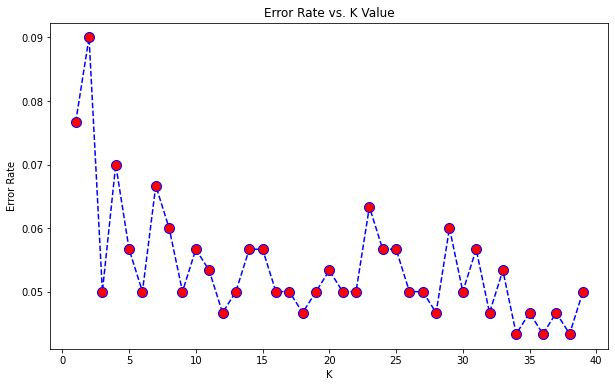

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [30]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[150   9]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [31]:
########################################
# repeat process with the non-norimilized df, what you get, and why?

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TARGET CLASS'], axis=1),df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [33]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[152   7]
 [ 11 130]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       159
           1       0.95      0.92      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [34]:
########################################################

In [35]:
##########################################################
# go back to scaled features
# run RF model, plot class report


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [38]:
model = RandomForestClassifier(random_state=47)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       159
           1       0.96      0.89      0.93       141

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
######################################################

In [40]:
#############################
# create a dataframe with rfc.feature_importances_ and the columns names

In [41]:
model.feature_importances_

array([0.15233813, 0.0761503 , 0.2127765 , 0.01801847, 0.02693895,
       0.05931571, 0.02179109, 0.16120536, 0.23984138, 0.03162412])

In [42]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [43]:
pd.DataFrame(index=df.columns[:-1], data=model.feature_importances_)

,0
WTT,0.152338
PTI,0.076150
EQW,0.212776
SBI,0.018018
LQE,0.026939
QWG,0.059316
FDJ,0.021791
PJF,0.161205
HQE,0.239841
NXJ,0.031624


In [44]:
pd.DataFrame(index=df.columns[:-1], data=model.feature_importances_, columns=['fe'])

,fe
WTT,0.152338
PTI,0.076150
EQW,0.212776
SBI,0.018018
LQE,0.026939
QWG,0.059316
FDJ,0.021791
PJF,0.161205
HQE,0.239841
NXJ,0.031624


In [45]:
pd.DataFrame(index=df.columns[:-1], data=model.feature_importances_, columns=['fe']) \
    .sort_values(by='fe', ascending=False)

,fe
HQE,0.239841
EQW,0.212776
PJF,0.161205
WTT,0.152338
PTI,0.076150
QWG,0.059316
NXJ,0.031624
LQE,0.026939
FDJ,0.021791
SBI,0.018018


In [46]:
fe = pd.DataFrame(index=df.columns[:-1], data=model.feature_importances_, columns=['RF']) \
    .sort_values(by='RF', ascending=False)

In [47]:
fe

,RF
HQE,0.239841
EQW,0.212776
PJF,0.161205
WTT,0.152338
PTI,0.076150
QWG,0.059316
NXJ,0.031624
LQE,0.026939
FDJ,0.021791
SBI,0.018018


In [48]:
############################################################
# what is the range of fe?
# find the answer in two ways


In [49]:
sum(model.feature_importances_)

1.0

In [50]:
RandomForestClassifier().fit( np.array([    [0], [1]     ]), np.array( [0,1] )     ).feature_importances_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1.])

In [51]:
RandomForestClassifier().fit( np.array([    [0], [0]     ]), np.array( [0,1] )     ).feature_importances_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.])

In [52]:
############################################################
# try multiplying different features with a factor of 100.
# what will happen to RF and KNN(23) ? why ?
# what this could indicate?

In [53]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.134537e-16,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [54]:
df_feat2 = df_feat.copy()

In [55]:
df_feat2.LQE *= 100

In [56]:
df_feat2.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.209433e-14,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+02,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+02,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e+01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e+00,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e+01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+02,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_feat2,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [58]:
rfc = RandomForestClassifier(random_state=47)
rfc.fit(X_train,y_train)
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       159
           1       0.96      0.89      0.93       141

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       159
           1       0.61      0.76      0.68       141

    accuracy                           0.66       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.66      0.66       300



In [60]:
df_feat3 = df_feat.copy()

In [61]:
df_feat3.HQE *= 100

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_feat3,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [63]:
rfc = RandomForestClassifier(random_state=47)
rfc.fit(X_train,y_train)
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       159
           1       0.96      0.89      0.93       141

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.81      0.79      0.80       141

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [65]:
df_feat4 = df_feat.copy()

In [66]:
df_feat4.SBI *= 100

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df_feat4,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)

In [68]:
rfc = RandomForestClassifier(random_state=47)
rfc.fit(X_train,y_train)
print(classification_report(y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       159
           1       0.96      0.89      0.93       141

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       159
           1       0.60      0.74      0.66       141

    accuracy                           0.65       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.66      0.65      0.65       300



In [70]:
fe

,RF
HQE,0.239841
EQW,0.212776
PJF,0.161205
WTT,0.152338
PTI,0.076150
QWG,0.059316
NXJ,0.031624
LQE,0.026939
FDJ,0.021791
SBI,0.018018


In [71]:
fe['KNN'] = ''
fe

,RF,KNN
HQE,0.239841,
EQW,0.212776,
PJF,0.161205,
WTT,0.152338,
PTI,0.076150,
QWG,0.059316,
NXJ,0.031624,
LQE,0.026939,
FDJ,0.021791,
SBI,0.018018,


In [72]:
############################################################
# make machanisem for ranking features with knn(23), compare to RF ranking of features
# (the order of importance)

In [73]:
df_feat2 = df_feat.copy()

for c in df_feat2.columns:
    df_feat2 = df_feat.copy()
    df_feat2[c] *= 100
    
    X_train, X_test, y_train, y_test = train_test_split(df_feat2,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)
    knn = KNeighborsClassifier(n_neighbors=23)
    knn.fit(X_train,y_train)
    score = knn.score(X_test, y_test)
    print(c, score)
    fe.loc[c, 'KNN'] = score

WTT 0.7466666666666667
PTI 0.74
EQW 0.81
SBI 0.65
LQE 0.66
QWG 0.7
FDJ 0.7233333333333334
PJF 0.7966666666666666
HQE 0.8133333333333334
NXJ 0.6533333333333333


In [74]:
fe

,RF,KNN
HQE,0.239841,0.813333
EQW,0.212776,0.81
PJF,0.161205,0.796667
WTT,0.152338,0.746667
PTI,0.076150,0.74
QWG,0.059316,0.7
NXJ,0.031624,0.653333
LQE,0.026939,0.66
FDJ,0.021791,0.723333
SBI,0.018018,0.65


In [75]:
fe.index[:5]

Index(['HQE', 'EQW', 'PJF', 'WTT', 'PTI'], dtype='object')

In [76]:
############################################################
# draw accuracy vs. number of features taken (KNN and RF in the same plot)
# take features by feature importance

In [77]:
rf_scores = []
knn_scores = []
for i in range(1, len(df_feat.columns)):
    print(i)
    df_feat3 = df_feat.copy()
    df_feat3 = df_feat[ fe.index[:i] ]
    X_train, X_test, y_train, y_test = train_test_split(df_feat3,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=101)
    knn = KNeighborsClassifier(n_neighbors=23)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test, y_test)) 
    rfc = RandomForestClassifier(random_state=47)
    rfc.fit(X_train,y_train)
    rf_scores.append(rfc.score(X_test, y_test)) 

1
2
3
4
5
6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

7
8
9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
rf_scores

[0.73,
 0.87,
 0.91,
 0.9266666666666666,
 0.9266666666666666,
 0.9233333333333333,
 0.94,
 0.92,
 0.9533333333333334]

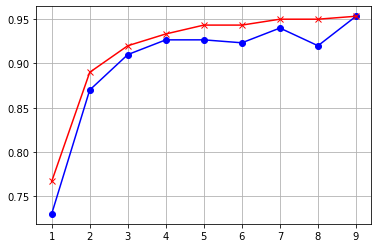

In [79]:
plt.plot(range(1, len(df_feat.columns)), rf_scores, "bo-",
         range(1, len(df_feat.columns)), knn_scores, "rx-",  
        )
plt.grid()